<a href="https://colab.research.google.com/github/MINED30/MODELING/blob/main/PEGASUS_to_KoBART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre

### Load Data

In [ ]:
# imports
!pip install transformers
!pip install hanja
import os
import random
import json
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm, trange

In [ ]:
import glob
list_dir = glob.glob("/content/drive/MyDrive/국회회의록/*.xlsx")[:3]

data = []
for i in range(len(list_dir)):
    sample_df = pd.read_excel(list_dir[i], sheet_name=None, skiprows=2)
    data.append(sample_df) #dictionary 객체 리스트

processed = []
for d in data:
    concat_df = pd.concat(d, ignore_index=True)
    processed.append(concat_df)

total_df = pd.concat(processed, ignore_index=True)
total_df

### Preprocessing

In [5]:
df_g = total_df[~total_df['발언내용'].isna()]
df_g['구분'] = df_g['대수'].apply(lambda x : str(x)+'대')+' '+df_g['회수'].apply(lambda x : x.split('(')[0])+' '+df_g['위원회']+' '+df_g['차수'].apply(lambda x : x.split('(')[0]) +' '+ df_g['회의구분']+' '+df_g['안건']
df_gg = df_g[['구분','발언내용']].reset_index(drop=True)
df_gg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,구분,발언내용
0,17대 제250회 국회본회의 제10차 본회의 개의,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다...
1,17대 제250회 국회본회의 제10차 본회의 개의,보고사항을 말씀드리겠습니다.(보고사항은 끝에 실음)
2,17대 제250회 국회본회의 제10차 본회의 o 위문금갹출의건(의장 제의),의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 ...
3,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 ...
4,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문,존경하는 김원기 국회의장님을 비롯한 여야 의원 여러분! 그리고 이해찬 국무총리를 ...
...,...,...
7759,21대 제389회 교육위원회 제1차 상임위원회 1. 2021년도 제2회 추가경정예산...,김철민 위원님 수고하셨습니다. 더 이상 토론하실 위원님들이 안 계시므로 대체토론을 ...
7760,21대 제389회 교육위원회 제1차 상임위원회 1. 2021년도 제2회 추가경정예산...,"위원장님, 잠깐 회의 마치기 전에 정청래 위원님 앞서 질의에 답변드리면서 단국대 감..."
7761,21대 제389회 교육위원회 제1차 상임위원회 1. 2021년도 제2회 추가경정예산...,"글쎄요, 저도 진행 중인 것으로 아는데 아까 그렇게 말씀을 하셔서……"
7762,21대 제389회 교육위원회 제1차 상임위원회 1. 2021년도 제2회 추가경정예산...,"감사는 완료가 됐고요, 3월에. 저희가 감사를 하고 나면 그 감사에 대한 심의를 진..."


In [9]:
# 구분 (안건기준)

from tqdm import tqdm
국회회의록 = {"title":[],"context":[]}

u = df_gg['구분'].unique()
for i in tqdm(range(len(u))):
  국회회의록['context'].append(' '.join(df_gg[df_gg['구분']==u[i]]['발언내용']))
  국회회의록['title'].append(u[i])
df_final = pd.DataFrame(국회회의록)

100%|██████████| 176/176 [00:00<00:00, 928.99it/s]


In [10]:
import hanja
def to_hangul(text):
    return hanja.translate(text, 'substitution')

tqdm.pandas()

df_final['context_r'] = df_final['context'].progress_apply(to_hangul)
df_final['title_r'] = df_final['title'].progress_apply(to_hangul)
df_final

100%|██████████| 176/176 [00:00<00:00, 3128.76it/s]


,title,context,context_r,title_r
0,17대 제250회 국회본회의 제10차 본회의 개의,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다...,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다...,17대 제250회 국회본회의 제10차 본회의 개의
1,17대 제250회 국회본회의 제10차 본회의 o 위문금갹출의건(의장 제의),의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 ...,의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 ...,17대 제250회 국회본회의 제10차 본회의 o 위문금갹출의건(의장 제의)
2,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 ...,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 ...,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문
3,17대 제250회 국회본회의 제10차 본회의 o 의사진행의건,"다음 질문이 계속되겠습니다마는, 의사진행발언 신청이 있어서 의사진행발언부터 하도록 ...","다음 질문이 계속되겠습니다마는, 의사진행발언 신청이 있어서 의사진행발언부터 하도록 ...",17대 제250회 국회본회의 제10차 본회의 o 의사진행의건
4,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문(계속),수고하셨습니다. 다음은 존경하는 이병석 의원 나오셔서 질문해 주십시오. 경북 포...,수고하셨습니다. 다음은 존경하는 이병석 의원 나오셔서 질문해 주십시오. 경북 포...,17대 제250회 국회본회의 제10차 본회의 2. 경제에관한질문(계속)
...,...,...,...,...
171,21대 제389회 기획재정위원회 제1차 상임위원회 2. 2021년도 제2회 추가경정...,그러면 다음 의사일정 제2항 기획재정부 소관 2012년도 제2회 추가경정예산안 및 ...,그러면 다음 의사일정 제2항 기획재정부 소관 2012년도 제2회 추가경정예산안 및 ...,21대 제389회 기획재정위원회 제1차 상임위원회 2. 2021년도 제2회 추가경정...
172,21대 제389회 농림축산식품해양수산위원회 제2차 상임위원회 개의,"위원님들, 좌석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제389회 국회(임시회...","위원님들, 좌석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제389회 국회(임시회...",21대 제389회 농림축산식품해양수산위원회 제2차 상임위원회 개의
173,21대 제389회 농림축산식품해양수산위원회 제2차 상임위원회 1. 2021년도 제2...,의사일정 제1항 농림축산식품부 그리고 해양수산부 소관 2021년도 제2회 추가경정예...,의사일정 제1항 농림축산식품부 그리고 해양수산부 소관 2021년도 제2회 추가경정예...,21대 제389회 농림축산식품해양수산위원회 제2차 상임위원회 1. 2021년도 제2...
174,21대 제389회 교육위원회 제1차 상임위원회 개의,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제389회 국회(임시회) 제1회 ...,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제389회 국회(임시회) 제1회 ...,21대 제389회 교육위원회 제1차 상임위원회 개의


In [25]:
df_k = df_final[['context_r']]
df_k.columns = ['context']
df_ = pd.concat([df_final[['context']],df_k[['context']]])
df_ = df_[~df_.duplicated()].reset_index(drop=True)
df_

,context
0,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다...
1,의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 ...
2,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 ...
3,"다음 질문이 계속되겠습니다마는, 의사진행발언 신청이 있어서 의사진행발언부터 하도록 ..."
4,수고하셨습니다. 다음은 존경하는 이병석 의원 나오셔서 질문해 주십시오. 경북 포...
...,...
222,"의사일정 제1항 기금관리기본법중개정법률안, 의사일정 제2항 사회간접자본시설에대한민간..."
223,"다음은 의사일정 제3항 종합부동산세법, 의사일정 제4항 국세기본법중개정법률안, 의사..."
224,의사일정 제7항 지방교부세법중개정법률안을 상정합니다. 양형일 의원 나오셔서 제안...
225,의사일정 제8항 정기간행물의등록등에관한법률개정법률안을 상정합니다. 정청래 의원 나...


### Split

In [16]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("hyunwoongko/kobart")

In [26]:
# 1안 : 3단계로나누어서 구분, 1536개이상은 3개로 나눔 -> 수정 및 리팩토링 필요
def split_token(ctx):
  ctx = '. ;'.join(ctx.split('. '))
  ctx = '? ;'.join(ctx.split('? '))
  ctx = [s.strip() for s in ctx.split(';') if s != ""]

  token_length = [tokenizer.encode(c).__len__() for c in ctx]
  if sum(token_length)<512:
    return [' '.join(ctx)]

  elif sum(token_length)>=512 and sum(token_length)<1024:
    l=0
    for i in range(len(token_length)):
      l += token_length[i]
      if l>=512:
        break
    return [' '.join(ctx[:i])]

  elif sum(token_length)>=1024 and sum(token_length)<1536:
    l=0
    for i in range(len(token_length)):
      l += token_length[i]
      if l>=512:
        break
    l=0
    for j in range(1,len(token_length)):
      l += token_length[-j]
      if l>=512:
        break
    return [' '.join(ctx[:i]),
            ' '.join(ctx[-j+1:])]

  elif sum(token_length)>=1536:
    l=0
    temp_index = [0]
    for i in range(len(token_length)):
      l += token_length[i]
      if l>=512:
        temp_index.append(i)
        l=token_length[i]

    l=0
    for j in range(1,len(token_length)):
      l += token_length[-j]
      if l>=512:
        break
    return_sentence = [' '.join(ctx[temp_index[s]:temp_index[s+1]]) for s in range(len(temp_index)-2)]
    return_sentence.extend([' '.join(ctx[-j+1:])])
    return return_sentence

context_dict = {"context":[]}
for i in tqdm(range(len(df_))):
  context_dict['context'].extend(split_token(df_['context'][i]))

100%|██████████| 227/227 [00:04<00:00, 53.46it/s]


In [33]:
df = pd.DataFrame(context_dict)
df

,context
0,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다....
1,의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 국...
2,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 분입...
3,"그것은 서로 대안을 제시하고 진지하게 머리를 맞대고 토론하고, 그래서 결론을 도출하..."
4,"지금 말씀하신 것처럼 지금 우리 사회는 사회보장 지출, 다음에 SOC 투자 등 재정..."
...,...
1703,"그런데 여기 보니까 19년 하반기 대비 20년 상반기, 이게 빠져 있고 20년 하반..."
1704,이 52시간 근로가 최저임금에 못지 않은 중소기업에 큰 타격이 될 수 있는데 이 부...
1705,"올해 전체적으로 한, 세계경제가 작년도에 선진국들이 워낙 마이너스 5%～10%가 되..."
1706,"예, 그러니까 지금…… 외국의 100개 기업이 우리나라에서 내는 세금과 우리 기업이..."


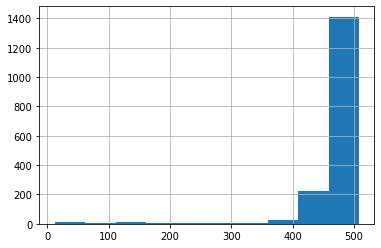

In [34]:
# 토큰 개수 분포(512개 제한)
df['token_len'] = df['context'].apply(lambda x : len(tokenizer.encode(x)))
df['token_len'].hist()

In [35]:
def count_sen(ctx):
  ctx = '. ;'.join(ctx.split('. '))
  ctx = '? ;'.join(ctx.split('? '))
  ctx = [s.strip() for s in ctx.split(';') if s != ""]
  return len(ctx)
  
df['sentence_len'] = df['context'].apply(count_sen)
df = df[df['sentence_len']>3].reset_index(drop=True)  # 3문장이하 삭제
df  

,context,token_len,sentence_len
0,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다....,42,4
1,의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 국...,498,22
2,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 분입...,498,16
3,"그것은 서로 대안을 제시하고 진지하게 머리를 맞대고 토론하고, 그래서 결론을 도출하...",494,17
4,"지금 말씀하신 것처럼 지금 우리 사회는 사회보장 지출, 다음에 SOC 투자 등 재정...",490,20
...,...,...,...
1695,"그런데 여기 보니까 19년 하반기 대비 20년 상반기, 이게 빠져 있고 20년 하반...",450,19
1696,이 52시간 근로가 최저임금에 못지 않은 중소기업에 큰 타격이 될 수 있는데 이 부...,463,21
1697,"올해 전체적으로 한, 세계경제가 작년도에 선진국들이 워낙 마이너스 5%～10%가 되...",476,17
1698,"예, 그러니까 지금…… 외국의 100개 기업이 우리나라에서 내는 세금과 우리 기업이...",494,29


# Gap Sentence Generation


### rouge func

In [37]:
def recall(test, label, rouge=1):
  label_n = []
  test_n = []

  for i in range(len(test.split(' '))-(rouge-1)):
    test_n.append(' '.join([test.split(' ')[i+r] for r in range(rouge)]))
  for i in range(len(label.split(' '))-(rouge-1)):
    label_n.append(' '.join([label.split(' ')[i+r] for r in range(rouge)]))

  total = len(label_n)
  match = 0
  if total==0 : 
    print(label_n,label)
    return None
  for word in label_n:
    if word in test_n:
      match += 1
  return match/total

def precision(test, label, rouge=1):
  label_n = []
  test_n = []

  for i in range(len(test.split(' '))-(rouge-1)):
    test_n.append(' '.join([test.split(' ')[i+r] for r in range(rouge)]))
  for i in range(len(label.split(' '))-(rouge-1)):
    label_n.append(' '.join([label.split(' ')[i+r] for r in range(rouge)]))

  total = len(test_n)
  match = 0

  if total==0 : 
    print(test_n,test)
    return None

  for word in test_n:
    if word in label_n:
      match += 1
  return match/total

def rouge_N(test, label, rouge=1,return_precision_and_recall=False):
  prec = precision(test,label,rouge)
  recc = recall(test,label,rouge)
  if (prec==None) or (recc==None):
    if return_precision_and_recall:
      return None, None, None
    return None

  if (prec+recc == 0):
    if return_precision_and_recall:
      return 0, 0, 0
    else :
      return 0

  f1 = 2*((prec*recc)/(prec+recc))
  if return_precision_and_recall:
    return f1, prec, recc
  else : 
    return f1


### top_k func

In [38]:
def get_top_k_sentence(doc:str,
                       verbose=False):
  docs = '. ;'.join(doc.split('. '))
  docs = '? ;'.join(docs.split('? '))
  docs = [s.strip() for s in docs.split(';') if s != ""]
  result = []
  
  for i in range(len(docs)):
    pred = docs.pop(i)
    score = rouge_N(pred, ' '.join(docs))
    docs.insert(i,pred)
    result.append((score,i))

  result = sorted(result,reverse=True)
  top_k_len = int(len(result)*0.3)
  if top_k_len<1 : top_k_len=1
  rouge_index = [v[1] for v in result[:top_k_len]]
  if verbose:
    print("입력된 문장의 갯수 :",len(docs))
    print("선장된 문장의 갯수 :",len(rouge_index))
  return rouge_index

get_top_k_sentence(df.iloc[20]['context'],True)

입력된 문장의 갯수 : 24
선장된 문장의 갯수 : 7


[1, 6, 4, 17, 2, 7, 3]

### GSG

In [45]:
from tqdm import tqdm

tqdm.pandas()

df['rouge_selected'] = df['context'].progress_apply(get_top_k_sentence)

100%|██████████| 1700/1700 [04:27<00:00,  6.35it/s]


In [46]:
df

,context,token_len,sentence_len,rouge_selected
0,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제10차 본회의를 개의하겠습니다....,42,4,[3]
1,의사일정에 들어가기 전에 위문금갹출의건을 의결하고자 합니다. 매년 연말이면 우리 국...,498,22,"[14, 16, 6, 9, 18, 10]"
2,의사일정 제2항 경제에관한질문을 상정합니다. 오늘 질문하실 의원은 모두 열여덟 분입...,498,16,"[13, 8, 9, 6]"
3,"그것은 서로 대안을 제시하고 진지하게 머리를 맞대고 토론하고, 그래서 결론을 도출하...",494,17,"[6, 3, 11, 7, 5]"
4,"지금 말씀하신 것처럼 지금 우리 사회는 사회보장 지출, 다음에 SOC 투자 등 재정...",490,20,"[12, 14, 16, 11, 15, 4]"
...,...,...,...,...
1695,"그런데 여기 보니까 19년 하반기 대비 20년 상반기, 이게 빠져 있고 20년 하반...",450,19,"[3, 5, 0, 8, 4]"
1696,이 52시간 근로가 최저임금에 못지 않은 중소기업에 큰 타격이 될 수 있는데 이 부...,463,21,"[0, 6, 5, 2, 4, 3]"
1697,"올해 전체적으로 한, 세계경제가 작년도에 선진국들이 워낙 마이너스 5%～10%가 되...",476,17,"[15, 10, 9, 11, 14]"
1698,"예, 그러니까 지금…… 외국의 100개 기업이 우리나라에서 내는 세금과 우리 기업이...",494,29,"[21, 3, 23, 27, 18, 19, 1, 22]"


# Training